# Netflix Data Visualization - BAN6420 Module 4 Assignment

In [430]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from path import Path                # for specifying the path to the required folders/directories
import os
import datetime as dt
from tabulate import tabulate

# Data preparation

In [438]:
# Rename file name from netflix_dataset to 'Netflix_shows_movies

# since the downloaded dataset is already unzipped, I will proceed to rename the file

file_path = Path('data2')/'netflix_data.csv'
renamed_path = Path('data2')/'Netflix_shows_movies.csv'

os.rename(file_path, renamed_path)


In [516]:
# import the dataset
df = pd.read_csv(renamed_path)

# inspect the dimensions of the dataframe
print(f"There are {df.shape[0]} observations/rows and {df.shape[1]} columns/variables in the netflix dataset")

# display basic info about the dataset
print(df.info())

# print the first few rows
df.head(3)

There are 6234 observations/rows and 12 columns/variables in the netflix dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None


show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...

# Clean and address missing values in the dataset

In [520]:
# from the dataframe info, we can already see that some columns have missing data, summarize columns with missing data
print("\nMissing Values Count:")
print(df.isna().sum())

# fill missing values with unknown (except date_added)
cols_missing_vals = ['director', 'cast', 'country', 'rating']
for col in df.columns:
    if col in cols_missing_vals:
        df[col] = df[col].fillna('unknown')

# convert the date_added variable from an object to a date object
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

# for the purpose of the analysis, we will fill the missing date_added with 1st July of the year of release
df['date_added'] = df.apply(lambda row: pd.Timestamp(f"{row['release_year']}-07-01") if pd.isna(row['date_added']) else row['date_added'],
    axis=1)

# create movie_duration that examine if type is 'Movie" and then strips ' min' from duration
df.loc[df['type'] == 'Movie', 'movie_duration (mins)'] = (df.loc[df['type'] == 'Movie', 'duration'].str.replace(' min', '', regex=False))
df['movie_duration (mins)'] = pd.to_numeric(df['movie_duration (mins)'], errors = 'coerce').fillna(0).astype('int64')

# create number_of_season that examine if type is 'TV Show" and then strips 'Season' from duration
df.loc[df['type'] == 'TV Show', 'number_of_season'] = (df.loc[df['type'] == 'TV Show', 'duration'].str.replace(' Season', '', regex=False)
    .str.replace('s', '', regex=False))
df['number_of_season'] = pd.to_numeric(df['number_of_season'], errors = 'coerce').fillna(0).astype('int64')

# Create genre columns from the listed_in columns
df[['genre', 'genre2', 'genre3']]= df['listed_in'].str.split(',', expand = True)

print(f"\nAfter Cleaning Missing Values:\n{df.isna().sum()}")


Missing Values Count:
show_id                     0
type                        0
title                       0
director                    0
cast                        0
country                     0
date_added                  0
release_year                0
rating                      0
duration                    0
listed_in                   0
description                 0
movie_duration (mins)    1969
dtype: int64

After Cleaning Missing Values:
show_id                     0
type                        0
title                       0
director                    0
cast                        0
country                     0
date_added                  0
release_year                0
rating                      0
duration                    0
listed_in                   0
description                 0
movie_duration (mins)       0
number_of_season            0
genre                       0
genre2                   1450
genre3                   3582
dtype: int64


# Conduct data exploration, including generating data descriptions and performing statistical analysis

In [522]:
# For numeric or date variables, the summary statisitics is below:


print(f"\nDescriptive Statistics for date_added:\n {df['date_added'].dt.date.describe().round(1)}")

print(f"\nDescriptive Statistics for release_year:\n {df['release_year'].describe().round(1)}")

print(f"\nDescriptive Statistics for Duration of Movie Type:\n {df[df['type'] == 'Movie']['movie_duration (mins)'].describe().round(1)}")

print(f"\nDescriptive Statistics for Number of Seasons of TV Show:\n {df[df['type'] == 'TV Show']['number_of_season'].describe().round(1)}")

# For object type variables
print(f"\nDescriptive Statistics for Object Type Variables:\n {tabulate(df.describe(include = [object]).round(1), headers = 'keys')}")

# summarize the movie type
print(f"\nThe Distribution of the movie type is:\n{df['type'].value_counts(dropna = False)}")
print(f"\nThe proportion of the movie type is:\n{df['type'].value_counts(dropna = False, normalize = True).round(2)}")


Descriptive Statistics for date_added:
 count           6234
unique          1166
top       2019-07-01
freq             232
Name: date_added, dtype: object

Descriptive Statistics for release_year:
 count    6234.0
mean     2013.4
std         8.8
min      1925.0
25%      2013.0
50%      2016.0
75%      2018.0
max      2020.0
Name: release_year, dtype: float64

Descriptive Statistics for Duration of Movie Type:
 count    4265.0
mean       99.1
std        28.1
min         3.0
25%        86.0
50%        98.0
75%       115.0
max       312.0
Name: movie_duration (mins), dtype: float64

Descriptive Statistics for Number of Seasons of TV Show:
 count    1969.0
mean        1.8
std         1.6
min         1.0
25%         1.0
50%         1.0
75%         2.0
max        15.0
Name: number_of_season, dtype: float64

Descriptive Statistics for Object Type Variables:
         type    title        director    cast     country        rating    duration    listed_in      description                     

# Create Visualizations

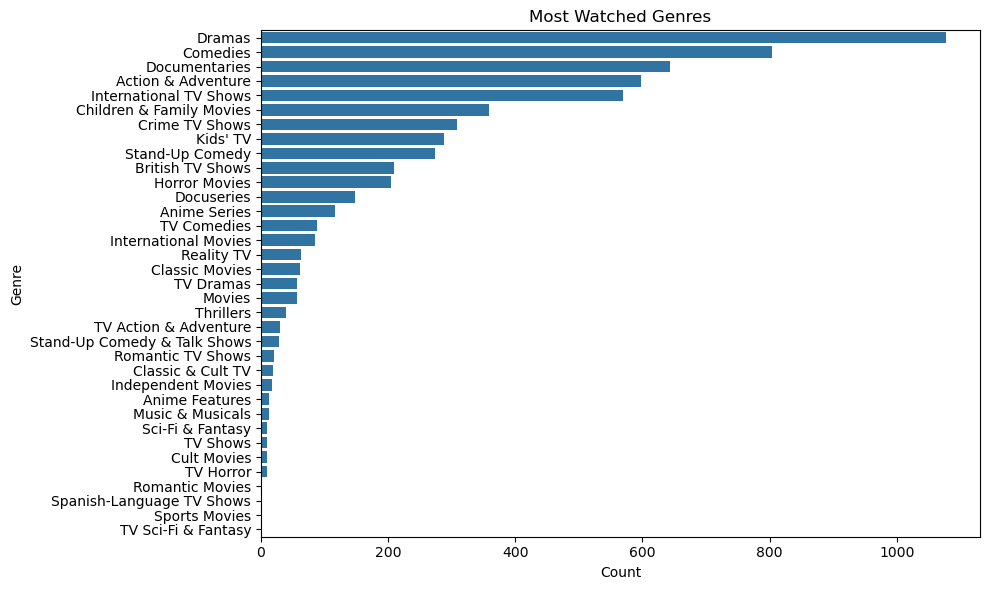

In [528]:
# Visualization for most watched Genre
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='genre', order=df['genre'].value_counts().index)
plt.title("Most Watched Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("most_watched_genres.png")
plt.show()

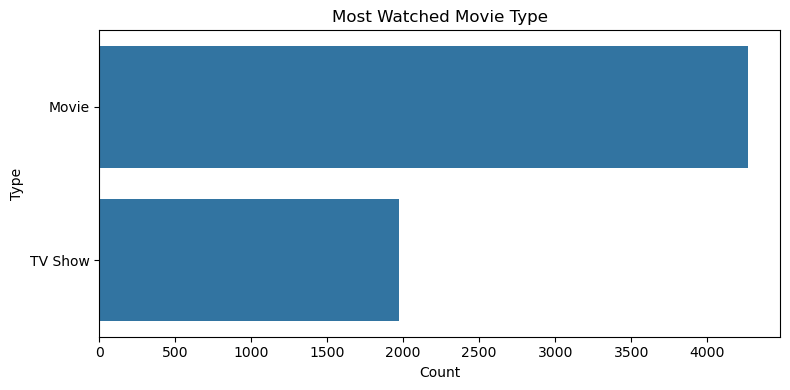

In [419]:
# Most Watched Movie Type
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='type', order=df['type'].value_counts().index)
plt.title("Most Watched Movie Type")
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.savefig("Movie Type.png")  # Save for R integration
plt.show()


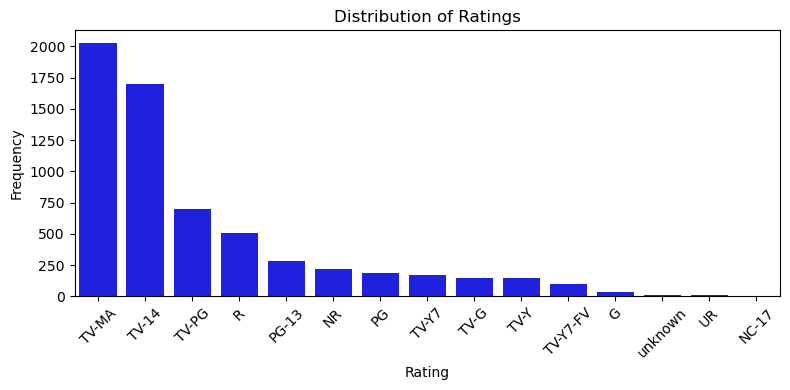

In [421]:
# Distribution of Ratings
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='rating',color='blue', order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("rating_distribution.png")
plt.show()

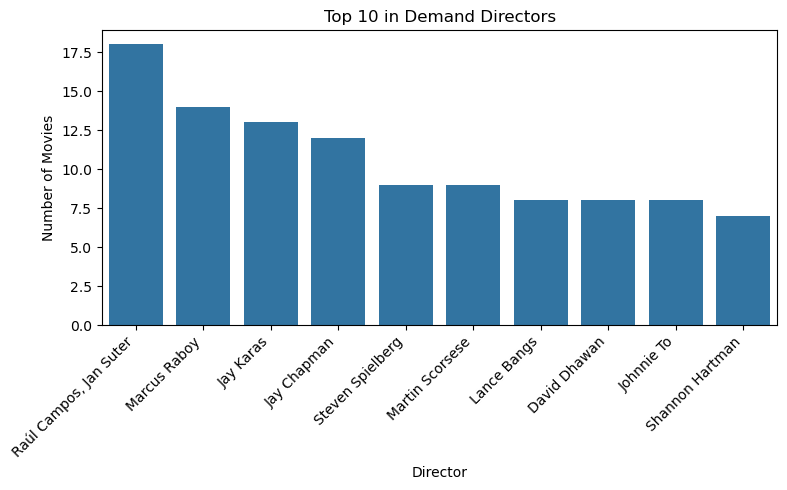

In [425]:
# Excluding unknowns, plot top 10 in demand directors
in_demand = df[df['director'] != 'unknown']['director'].value_counts().head(10)
plt.figure(figsize = [8,5])
sns.barplot(x = in_demand.index, y = in_demand.values)
plt.title('Top 10 in Demand Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top_10_directors.png')
plt.show()